In [231]:
import numpy as np
import matplotlib.pyplot as plt

import random as random

from scipy.stats import poisson

plt.rcParams["axes.grid"] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14



In [232]:
x_0 = 0
delta = 1

mu = 100

def new_state(x) -> int: #Generate a new state that is somewhat in the near of the old one.
    
    if random.random() < 0.5:
        epsilon = 3
    else:
        epsilon = -3

    #epsilon = round(random.uniform(-delta, delta))
    y = x + epsilon

    return y


def transition_prob(x_old, x_new) -> float:
    if(x_new>x_old):
        return mu**3/((x_new+3)*(x_new+2)*(x_new+1))
    elif(x_new<x_old):
        return x_old*(x_old-1)*(x_old-2)/mu**3

    #numerator = poisson.pmf(x_new, mu = mu)

    #denominator = poisson.pmf(x_old, mu = mu)

    #return numerator/denominator




In [233]:
N = int(1000000)

data = np.zeros(N)

data[0] = x_0

index = 1
tries = 0

while(tries < N):

    current_x = data[index-1]
    y = int(new_state(current_x))

    trans_prob = min(transition_prob(current_x, y), 1.0)

    if(random.random() < trans_prob):
        data[index] = y
        index += 1

    tries +=1

print("Acceptance rate: "  + str(round(index/N, 3)))

Acceptance rate: 0.864


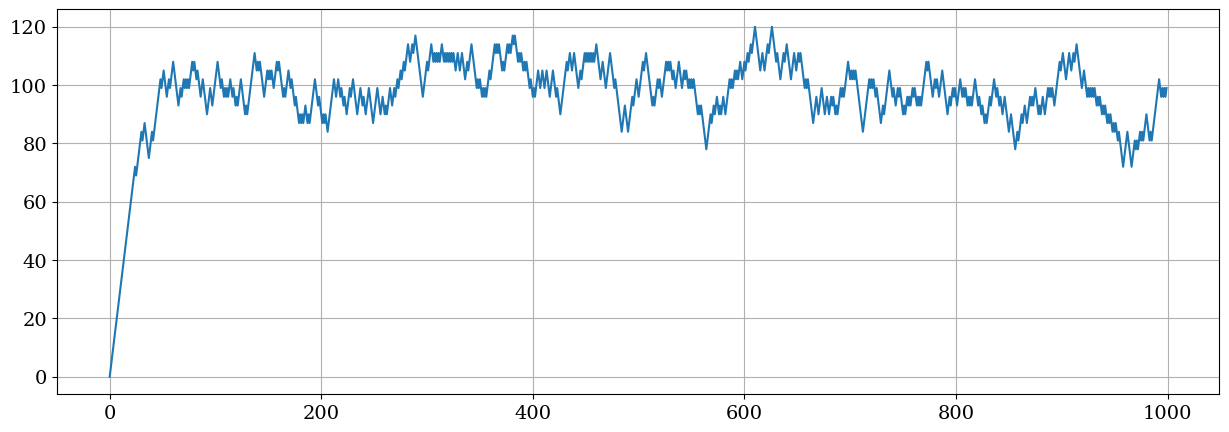

In [234]:
data = data[:index]

fig, ax = plt.subplots(figsize = (15,5))

ax.plot(data[:1000])

[Text(0.5, 0, 'Xi'), Text(0, 0.5, 'Normalised count')]

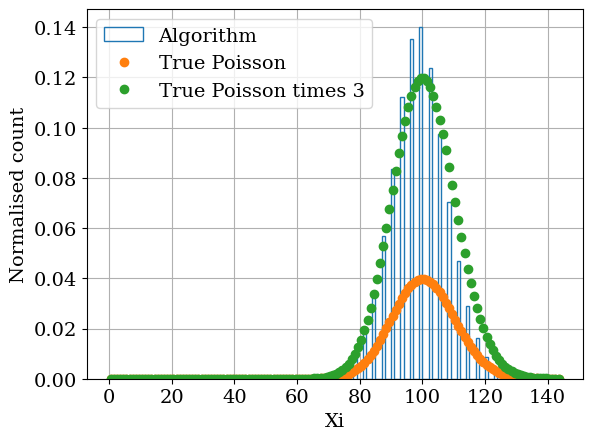

In [235]:
fig, ax = plt.subplots()

x = np.arange(0, max(data))
y = np.zeros_like(x)
y = poisson.pmf(x, mu = mu)

ax.hist(data, bins = round(max(data)), histtype='step', density = True, label = "Algorithm")
ax.plot(x + 0.5 ,y, 'o', label = "True Poisson")
ax.plot(x + 0.5 ,y*3, 'o', label = "True Poisson times 3")
ax.legend()

ax.set(xlabel = "Xi", ylabel = "Normalised count")

In [236]:
np.mean(data), np.var(data)

(98.47118421692016, 81.18065320183845)

In [237]:
def generatePoisson(xi, steps):
    L = np.exp(-xi)
    values = np.zeros(steps)

    for i in range(steps):
        p = 1
        k = 1

        while(L<p):
            p = p*random.random()
            k += 1
            
        values[i] = k-1

    return values
    

(array([0.0011, 0.0022, 0.0066, 0.0187, 0.0396, 0.0572, 0.0957, 0.1298,
        0.1452, 0.1529, 0.    , 0.1078, 0.1089, 0.0715, 0.066 , 0.0374,
        0.0286, 0.0154, 0.0066, 0.0022, 0.0044, 0.0022]),
 array([ 2.        ,  2.90909091,  3.81818182,  4.72727273,  5.63636364,
         6.54545455,  7.45454545,  8.36363636,  9.27272727, 10.18181818,
        11.09090909, 12.        , 12.90909091, 13.81818182, 14.72727273,
        15.63636364, 16.54545455, 17.45454545, 18.36363636, 19.27272727,
        20.18181818, 21.09090909, 22.        ]),
 [<matplotlib.patches.Polygon at 0x25418b4a400>])

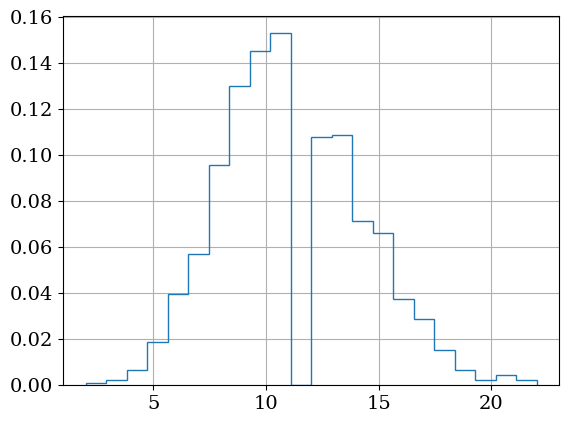

In [238]:
Xi10 = generatePoisson(10, 1000)


plt.hist(Xi10, bins = round(max(Xi10)), histtype='step', density = True)

In [239]:

means = np.arange(0, 1000, 5)
algorithm_mean = np.zeros_like(means)
algorithm_variance = np.zeros_like(means)

for i in range(len(means)):
    data = generatePoisson(means[i], 1000)
    algorithm_mean[i] = np.mean(data)
    algorithm_variance[i] = np.var(data)


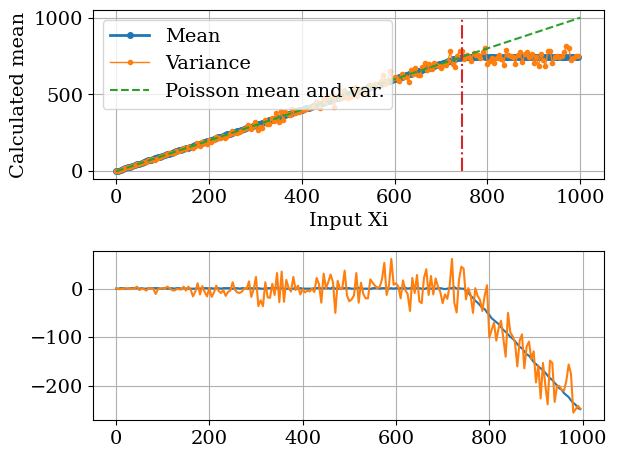

In [240]:

fig, ax = plt.subplots(2)

ax[0].plot(means, algorithm_mean, '-o', label = "Mean", linewidth = 2, markersize = 4) 
ax[0].plot(means, algorithm_variance, '-o', label = "Variance", linewidth = 1, markersize = 3)    
ax[0].plot(np.array([0,1000]), np.array([0, 1000]), '--', label = "Poisson mean and var.")
ax[0].plot(np.array([745, 745]), np.array([0, 1000]), '-.')

ax[0].set(xlabel="Input Xi", ylabel="Calculated mean")
ax[0].legend()


ax[1].plot(means[:745], algorithm_mean-means[:745])
ax[1].plot(means[:745], algorithm_variance-means[:745])


fig.tight_layout()